In [1]:
import os
import math
import pickle
import numpy as np
from math import log
from scipy import signal 
import matplotlib as mpl
from statistics import mean
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 6
rcParams.update({'figure.max_open_warning': 0, 'font.size': 14, 'axes.titlesize': 14,
                 'axes.labelsize': 14, 'axes.grid':True, 'xtick.direction': 'in', 'ytick.direction': 'in',
                 'ytick.right': True, 'xtick.top':True, 'ytick.major.size': 10, 'xtick.major.size': 10,
                 'legend.fancybox': True, 'legend.markerscale': 0.8, 'legend.handlelength': 5.0})

#from cycler import cycler
mpl.rcParams['grid.linestyle'] = '-.'
#rcParams.keys() 
#plt.style.use('dark_background')
#print(plt.style.available)

In [3]:
pkl_file = open('../2020-05-27_09-07-44.pkl.gz', 'rb')
mydata = pickle.load(pkl_file)
mydata.keys()

dict_keys(['Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch7'])

In [4]:
print(mydata['Ch4'])   

[[1575 1572 1574 ... 1570 1580 1576]
 [1574 1591 1577 ... 1560 1576 1591]
 [1590 1563 1583 ... 1577 1576 1577]
 ...
 [1585 1581 1577 ... 1571 1579 1580]
 [1569 1584 1581 ... 1590 1582 1576]
 [1572 1582 1578 ... 1572 1579 1572]]


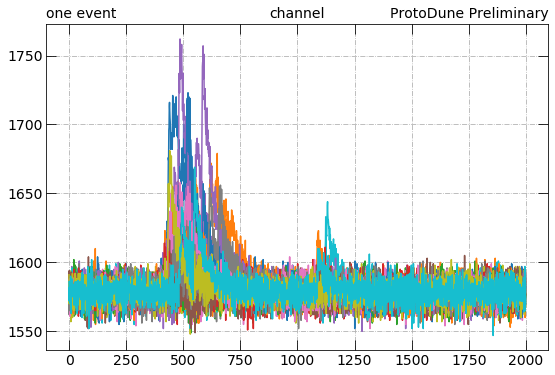

In [5]:
for x in range(20):
    #print(x)
    data=(mydata['Ch4'][x])
    plt.plot((data))
    plt.title('channel')
    plt.title('one event', loc='left')
    plt.title('ProtoDune Preliminary', loc='right')
    plt.grid(True)

plt.show()



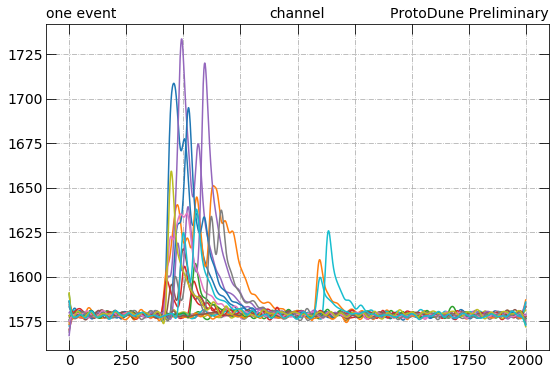

In [6]:
from scipy import signal

for x in range(20):
    #print(x)
    data=(mydata['Ch4'][x])
    b, a = signal.butter(3, 0.05)

    y = signal.filtfilt(b, a, data)
    plt.plot((y))
    plt.title('channel')
    plt.title('one event', loc='left')
    plt.title('ProtoDune Preliminary', loc='right')
    plt.grid(True)

plt.show()

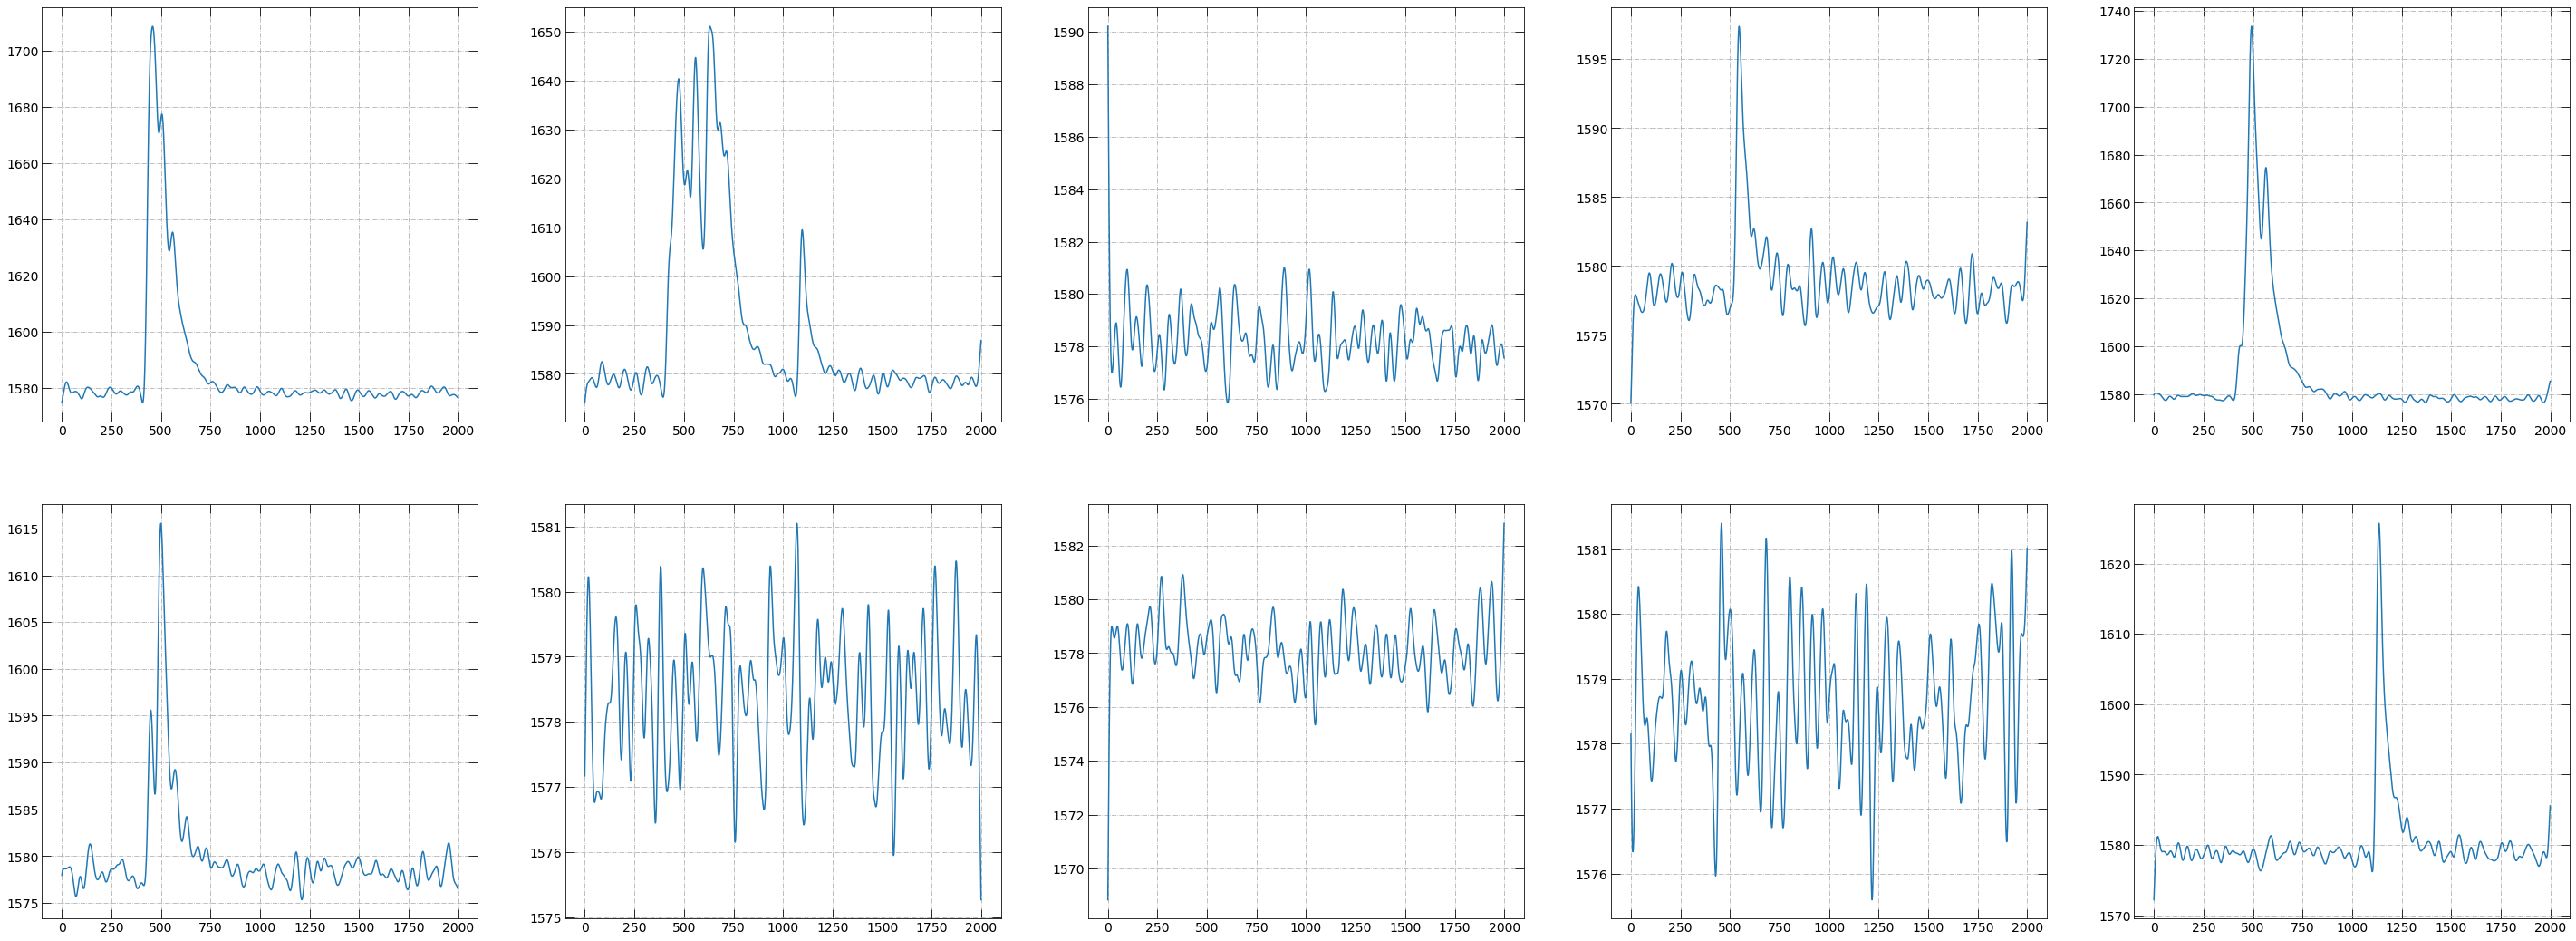

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

nrows, ncols = 20, 5

fig = plt.figure(figsize=(50,200))    
for i in range(1,11):
    ax = fig.add_subplot(nrows, ncols, i)
    data=mydata['Ch4'][i-1]

    b, a = signal.butter(3, 0.05)
    y = signal.filtfilt(b, a, data)    

    ax.plot(y)

plt.show()

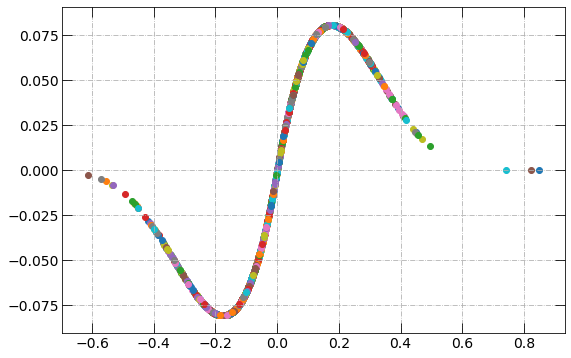

In [9]:
from scipy import signal
from scipy import stats

#for key in range(86,91):
for key in range(2000):    
    #print(x)
    y1 = mydata['Ch4'][key]
    y=y1[390:410]
    #print(y)
    x = np.arange(len(y))
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    trend=np.absolute(slope)
    
    #plt.scatter(trend,intercept)
    #plt.scatter(slope*std_err,std_err)
    plt.scatter(r_value,r_value*p_value)
    
plt.show()    

In [10]:
## from scipy import stats

linreg_array = np.array([])
arr=mydata['Ch4']

for row in arr[:,0:400]:
    y = row
    #print(y.shape)
    x = np.arange(len(row))
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    #trend= r_value * p_value
    #mask = [trend < 0 ]
  
    trend=np.absolute(slope)
    mask= [trend  < 0.001 ] 
    
    linreg_array = np.append(linreg_array, mask, axis=0)
    linreg_array=linreg_array > 0
    #print(mask)
    #print(trend)
    #plt.plot(row)
eventSel=arr[linreg_array]
print(eventSel.shape)

linreg_array2 = np.array([])
for row in eventSel[:,0:400]:
    y = row
    #print(y.shape)
    x = np.arange(len(row))
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    trend=np.absolute(slope)
    
    mask= [trend  < 0.001 ]
   
    
    linreg_array2 = np.append(linreg_array2, mask, axis=0)
    linreg_array2 = linreg_array2 > 0
    #print(mask)
    #print(trend)
    #plt.plot(row)
test=eventSel[linreg_array2]
print(test.shape)



(4005, 2000)
(4005, 2000)


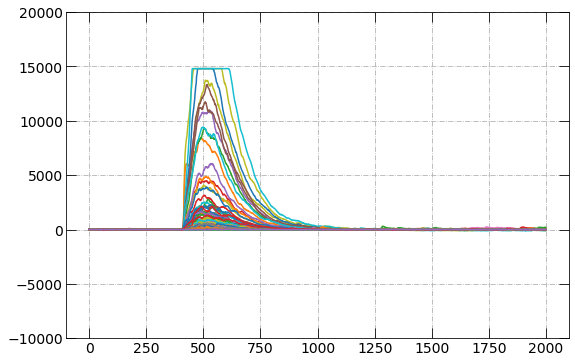

In [13]:
baseline = test[0:test.size, 0:100].mean(axis=1)
#print(arr.size)
#Nevent = (baseline.size)
#print('nevent', Nevent)
blines = baseline.reshape(baseline.size, 1)
clean = test-blines
clean.shape
for row in clean:
    plt.ylim(-10000,20000)

    plt.plot(row)
    #print(row)
    #gauss=gaussian_filter(row, sigma=1)

    #plt.plot(gauss)

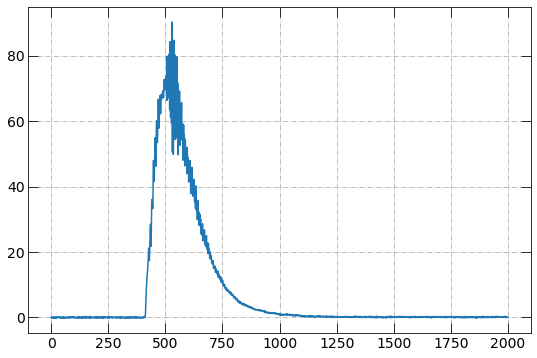

In [14]:
baseline = eventSel[0:eventSel.size, 0:100].mean(axis=1)
#print(arr.size)
#Nevent = (baseline.size)
#print('nevent', Nevent)
blines = baseline.reshape(baseline.size, 1)
clean = eventSel-blines
clean.shape
plt.plot(clean.mean(axis=0))


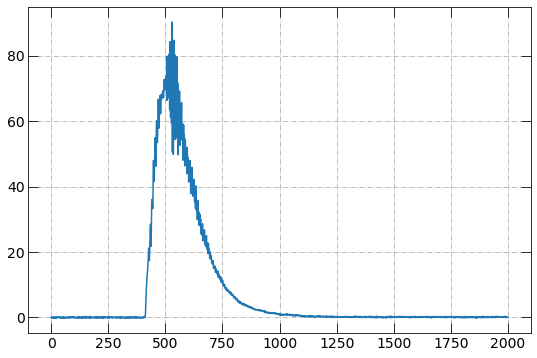

In [15]:
baseline = test[0:test.size, 0:100].mean(axis=1)
#print(arr.size)
#Nevent = (baseline.size)
#print('nevent', Nevent)
blines = baseline.reshape(baseline.size, 1)
clean = test-blines
clean.shape
plt.plot(clean.mean(axis=0))

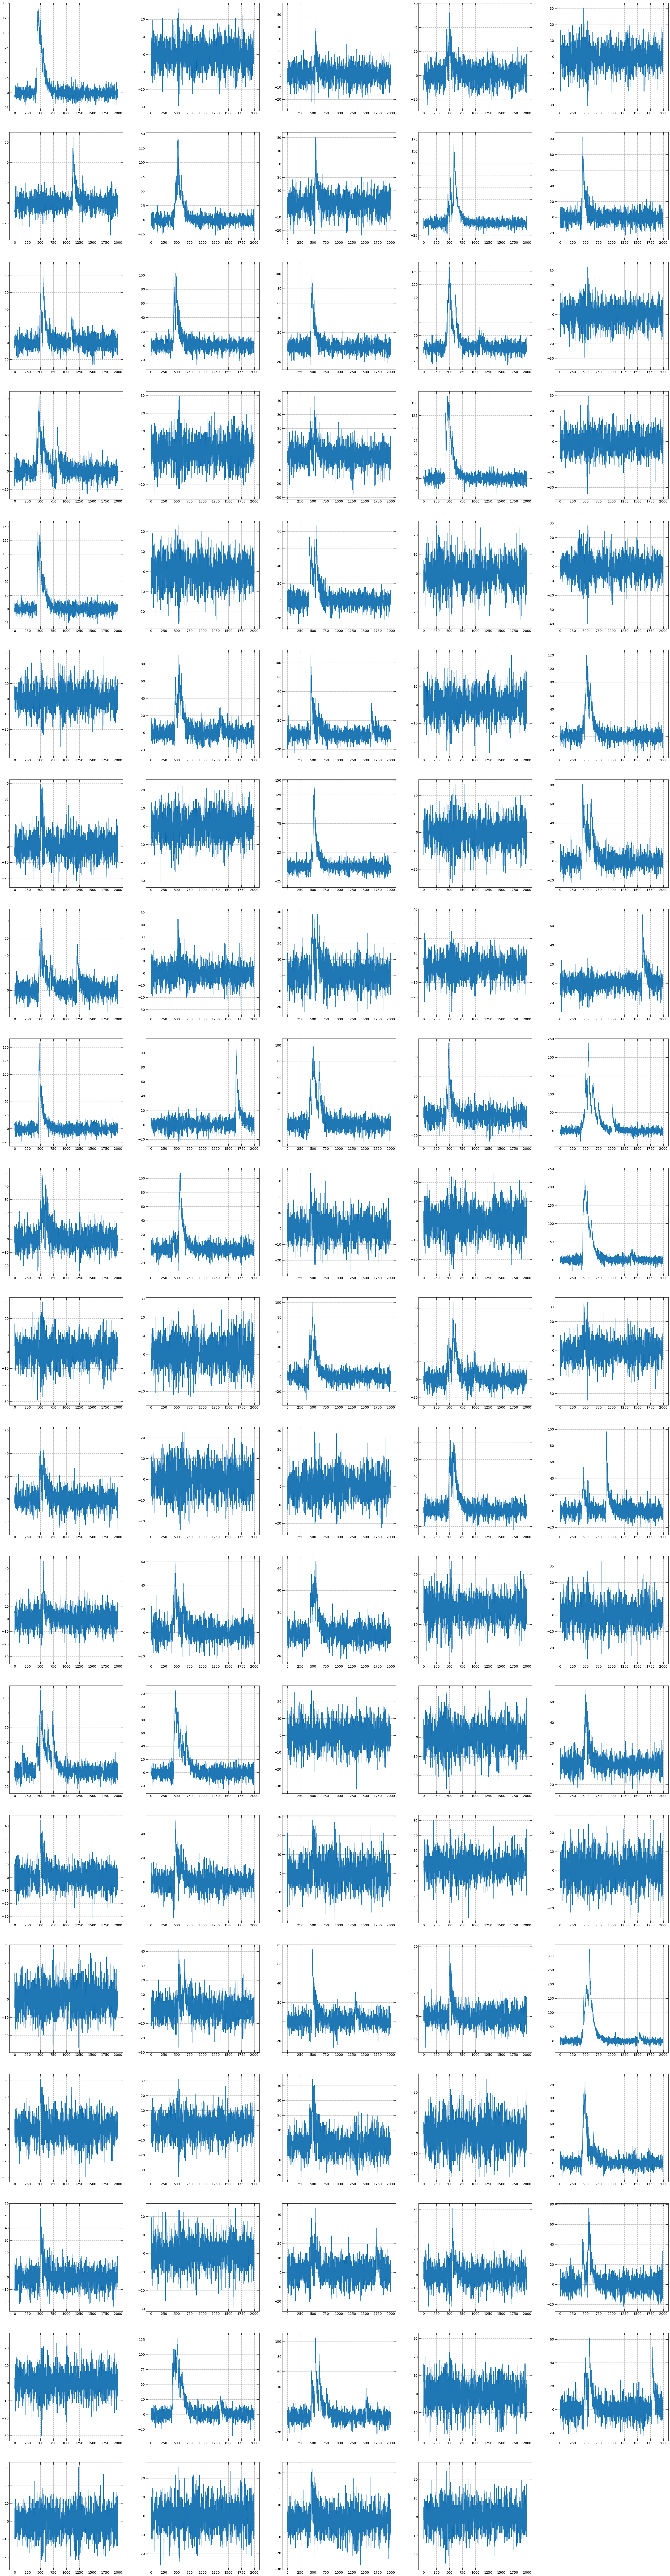

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
nrows, ncols = 20, 5

fig = plt.figure(figsize=(50,200))    
for i in range(1,100):
    ax = fig.add_subplot(nrows, ncols, i)
    data=clean[i-1]


    ax.plot(data)

plt.show()